In [1]:
# Library cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from dotenv import load_dotenv
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Load data

In [2]:
# file path from env 
load_dotenv()
file_path = os.getenv('PATH_DATA')
# read data from file
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
df.tail(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


## Analyze data

In [5]:

# Show shape data
print(df.shape, end='\n ---------------- \n')
# Show info data
print(df.info(), end='\n ---------------- \n')
# Check for Duplicate
print(df.nunique(), end='\n ---------------- \n')
# Check data exist nan or not (bool)
print(df.isnull().any(), end='\n ---------------- \n')
# Check for missing value
print(df.isna().sum(), end='\n ---------------- \n')

(1480, 38)
 ---------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 no

Note: `YearsWithCurrManager` have some rows with null value (57/1480).

## Data cleaning

In [6]:
# Drop duplicate EmployeeID
n_df = df.drop_duplicates(subset=['EmpID'])

In [7]:
# Check value of columns with Object type
n_df.select_dtypes(include='object').head(5)

,EmpID,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,Over18,OverTime
0,RM297,18-25,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Upto 5k,Y,No
1,RM302,18-25,No,Travel_Rarely,Sales,Medical,Female,Sales Representative,Single,Upto 5k,Y,No
2,RM458,18-25,Yes,Travel_Frequently,Sales,Marketing,Male,Sales Representative,Single,Upto 5k,Y,Yes
3,RM728,18-25,No,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,Upto 5k,Y,No
4,RM829,18-25,Yes,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,Upto 5k,Y,No


Note: All columns filled with correctly type so data is clean

In [8]:
# Check duplicate
print(n_df.duplicated().sum(), end='\n ---------------- \n')
# Check shape data
print(n_df.shape, end='\n ---------------- \n')

0
 ---------------- 
(1470, 38)
 ---------------- 


## Analysis data

In [9]:
n_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
# Check all deparment of company
n_df['Department'].unique() 

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [11]:
# Create df for each department
df_sales = n_df[n_df['Department'] == 'Sales']
print('Number of Sales: ',df_sales['EmpID'].count())
df_hr = n_df[n_df['Department'] == 'Human Resources']
print('Number of HR: ',df_hr['EmpID'].count())
df_rd = n_df[n_df['Department'] == 'Research & Development']
print('Number of R&D: ',df_rd['EmpID'].count())

Number of Sales:  446
Number of HR:  63
Number of R&D:  961


### Univariate Analysis

#### Check performance rating each department

In [12]:
# Mean of 'PerformanceRating' each department
print('Sales :', df_sales['PerformanceRating'].mean())
print('Human Resources :', df_hr['PerformanceRating'].mean())
print('Research & Development :', df_rd['PerformanceRating'].mean())

Sales : 3.1367713004484306
Human Resources : 3.142857142857143
Research & Development : 3.162330905306972


#### Performance rate

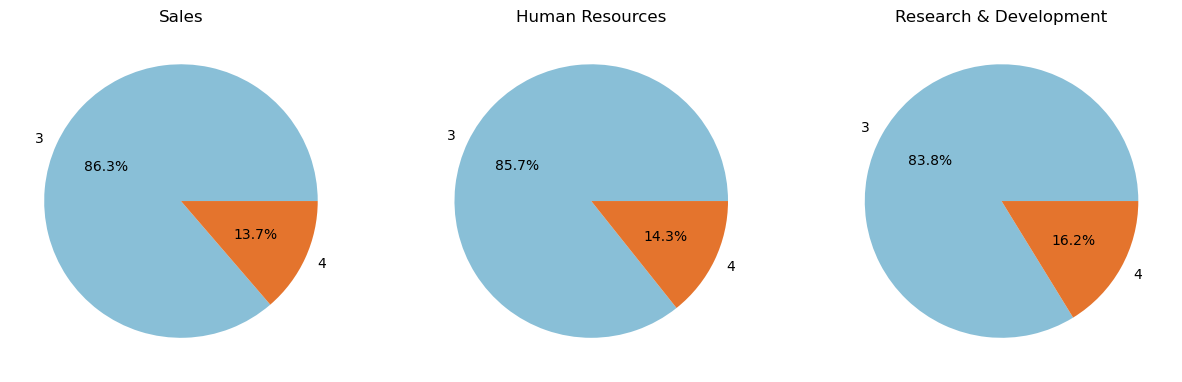

In [13]:
colors = ['#89bfd7', '#e4742d']
# Plot pie chart for each department count of 'PerformanceRating'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Pie chart for Sales department
df_sales['PerformanceRating'].value_counts().plot.pie(
    ax=ax[0], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[0].set_title('Sales')
ax[0].set_ylabel('')
# Pie chart for Human Resources department
df_hr['PerformanceRating'].value_counts().plot.pie(
    ax=ax[1], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[1].set_title('Human Resources')
ax[1].set_ylabel('')
# Pie chart for Research & Development department
df_rd['PerformanceRating'].value_counts().plot.pie(
    ax=ax[2], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[2].set_title('Research & Development')
ax[2].set_ylabel('')
plt.show()

#### Enviroment Satisfaction

In [14]:
# Mean of 'EnviromentSatisfaction' each department
print('Sales :', df_sales['EnvironmentSatisfaction'].mean())
print('Human Resources :', df_hr['EnvironmentSatisfaction'].mean())
print('Research & Development :', df_rd['EnvironmentSatisfaction'].mean())

Sales : 2.679372197309417
Human Resources : 2.6825396825396823
Research & Development : 2.7440166493236213


Note: Mean of `EnvironmentSatisfaction` shows that there is a problem in the company and each department, people are really unhappy with the work environment. Solving this problem could increase `PermancerRating` above

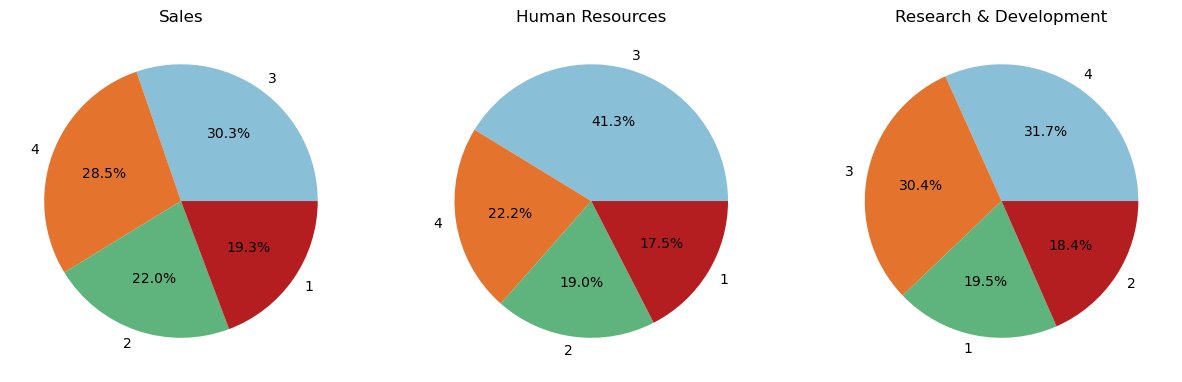

In [15]:
colors = ['#89bfd7', '#e4742d','#5fb37d', '#b51e21']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Pie chart for Sales department
df_sales['EnvironmentSatisfaction'].value_counts().plot.pie(
    ax=ax[0], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[0].set_title('Sales')
ax[0].set_ylabel('')
# Pie chart for Human Resources department
df_hr['EnvironmentSatisfaction'].value_counts().plot.pie(
    ax=ax[1], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[1].set_title('Human Resources')
ax[1].set_ylabel('')
# Pie chart for Research & Development department
df_rd['EnvironmentSatisfaction'].value_counts().plot.pie(
    ax=ax[2], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[2].set_title('Research & Development')
ax[2].set_ylabel('')
plt.show()

In [16]:
df_sales[df_sales['EnvironmentSatisfaction'] == 1]['EmpID']

30      RM358
31      RM363
73      RM097
76      RM415
81      RM526
        ...  
1425    RM976
1449    RM425
1466    RM064
1467    RM071
1477    RM537
Name: EmpID, Length: 86, dtype: object

In [17]:
df_hr[df_hr['EnvironmentSatisfaction'] == 1]['EmpID']

12       RM423
95      RM1246
208     RM1380
317     RM1314
403      RM311
629     RM1040
762      RM634
902     RM1290
1136     RM494
1158    RM1166
1316     RM478
Name: EmpID, dtype: object

In [18]:
df_rd[df_rd['EnvironmentSatisfaction'] == 1]['EmpID']

15       RM893
21       RM690
24       RM857
37       RM916
46       RM384
         ...  
1442    RM1024
1443    RM1355
1459     RM939
1463    RM1311
1475     RM412
Name: EmpID, Length: 187, dtype: object

Note: It is advisable to collect the opinions of these employees to improve the working environment, employees with a reduced rating of 1 can have a positive impact on other ratings.

#### Relationship Satisfaction

In [19]:
# Mean of 'RelationshipSatisfaction' each department
print('Sales :', df_sales['RelationshipSatisfaction'].mean())
print('Human Resources :', df_hr['RelationshipSatisfaction'].mean())
print('Research & Development :', df_rd['RelationshipSatisfaction'].mean())

Sales : 2.695067264573991
Human Resources : 2.888888888888889
Research & Development : 2.708636836628512


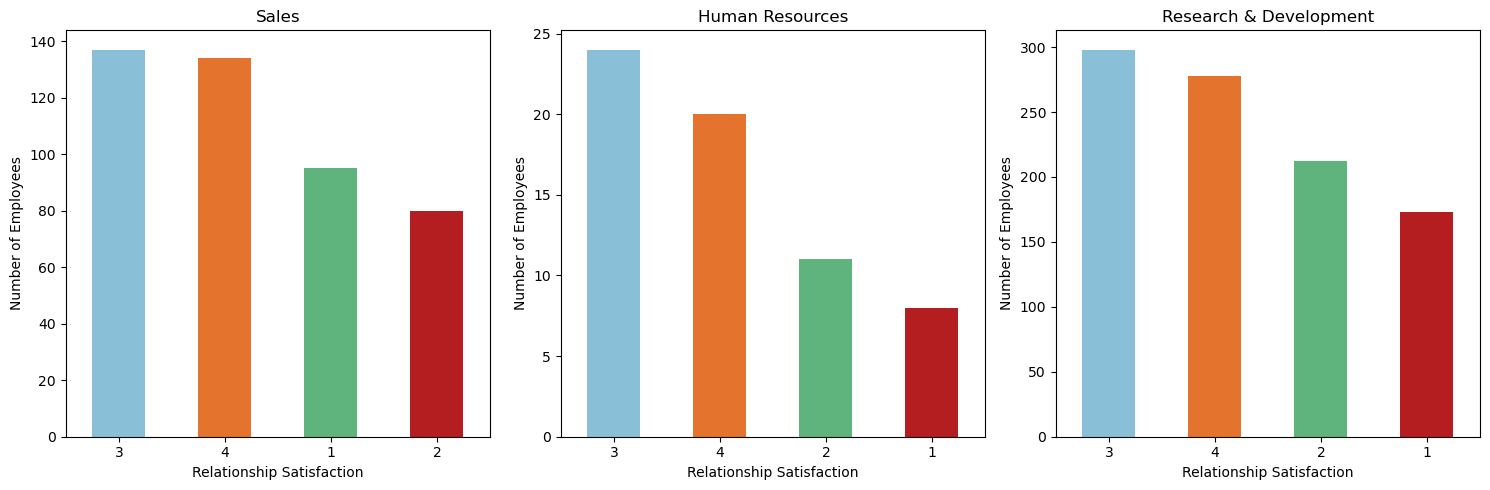

In [20]:
colors = ['#89bfd7', '#e4742d', '#5fb37d', '#b51e21']

# Plot bar chart for each department count of 'EnvironmentSatisfaction'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart for Sales department
df_sales['RelationshipSatisfaction'].value_counts().plot.bar(
    ax=ax[0], 
    color=colors,
    rot=0  # Rotate x-axis labels for better readability
)
ax[0].set_title('Sales')
ax[0].set_ylabel('Number of Employees')
ax[0].set_xlabel('Relationship Satisfaction')

# Bar chart for Human Resources department
df_hr['RelationshipSatisfaction'].value_counts().plot.bar(
    ax=ax[1], 
    color=colors,
    rot=0
)
ax[1].set_title('Human Resources')
ax[1].set_ylabel('Number of Employees')
ax[1].set_xlabel('Relationship Satisfaction')

# Bar chart for Research & Development department
df_rd['RelationshipSatisfaction'].value_counts().plot.bar(
    ax=ax[2], 
    color=colors,
    rot=0
)
ax[2].set_title('Research & Development')
ax[2].set_ylabel('Number of Employees')
ax[2].set_xlabel('Relationship Satisfaction')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [21]:
df_sales[df_sales['RelationshipSatisfaction'] == 1]['EmpID']

1        RM302
10       RM172
26      RM1179
27      RM1198
70      RM1439
         ...  
1318     RM529
1325     RM752
1350     RM919
1363     RM562
1386     RM761
Name: EmpID, Length: 95, dtype: object

In [22]:
df_hr[df_hr['RelationshipSatisfaction'] == 1]['EmpID']

208     RM1380
301     RM1006
377     RM1065
1081     RM879
1159    RM1201
1186     RM760
1432    RM1402
1440     RM957
Name: EmpID, dtype: object

In [23]:
df_rd[df_rd['RelationshipSatisfaction'] == 1]['EmpID']

22       RM732
24       RM857
29       RM275
34       RM664
35       RM778
         ...  
1450    RM1054
1458     RM701
1465     RM007
1469     RM226
1471     RM744
Name: EmpID, Length: 173, dtype: object

In [24]:
# 'YearsAtCompany' of Sales department
print('Mean year at company of employees in Sales :', df_sales['YearsAtCompany'].mean()) 
print('Mode year at company of employees in Sales Sales :', df_sales['YearsAtCompany'].mode())
print(df_sales['YearsAtCompany'].quantile([0.25, 0.5, 0.75]))

Mean year at company of employees in Sales : 7.2847533632287
Mode year at company of employees in Sales Sales : 0    5
Name: YearsAtCompany, dtype: int64
0.25     3.0
0.50     6.0
0.75    10.0
Name: YearsAtCompany, dtype: float64


#### Analyze "*YearsAtCompany*"

In [25]:
# 'YearsAtCompany' of Human Resources department
print('Mean year at company of employees in Human Resources :', df_hr['YearsAtCompany'].mean())
print('Mode year at company of employees in Human Resources :', df_hr['YearsAtCompany'].mode())
print(df_hr['YearsAtCompany'].quantile([0.25, 0.5, 0.75]))

Mean year at company of employees in Human Resources : 7.238095238095238
Mode year at company of employees in Human Resources : 0    5
Name: YearsAtCompany, dtype: int64
0.25    3.0
0.50    5.0
0.75    9.0
Name: YearsAtCompany, dtype: float64


In [26]:
# 'YearsAtCompany' of Research & Development department
print('Mean year at company of employees in Research & Development :', df_rd['YearsAtCompany'].mean())
print('Mode year at company of employees in Research & Development :', df_rd['YearsAtCompany'].mode())
print(df_rd['YearsAtCompany'].quantile([0.25, 0.5, 0.75]))

Mean year at company of employees in Research & Development : 6.8647242455775235
Mode year at company of employees in Research & Development : 0    5
Name: YearsAtCompany, dtype: int64
0.25    3.0
0.50    5.0
0.75    9.0
Name: YearsAtCompany, dtype: float64


#### Work life balance

In [27]:
# 'WorkLifeBalance' mean of each department
print('Sales :', df_sales['WorkLifeBalance'].mean())
print('Human Resources :', df_hr['WorkLifeBalance'].mean())
print('Research & Development :', df_rd['WorkLifeBalance'].mean())


Sales : 2.8161434977578477
Human Resources : 2.9206349206349205
Research & Development : 2.72528616024974


Work life balance may be one of all reason for low `EnvironmentRating` or `RelationshipSatisfaction`,because, there is an uneven division or one person has to do too much work

In [28]:
# Combine all departments into a single DataFrame for plotting
df_combined = pd.concat([
    df_sales.assign(Department='Sales'),
    df_hr.assign(Department='Human Resources'),
    df_rd.assign(Department='Research & Development')
])
# Prepare the data for treemap
df_treemap = df_combined.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='Counts')
# Create treemap using Plotly Express
fig = px.treemap(
    df_treemap,
    path=['Department', 'WorkLifeBalance'],
    values='Counts',
    title='WorkLifeBalance Ratings Distribution by Department'
)
# Show the plot
fig.show()

![detail2](img/wlp.png)

In [29]:
df_combined[df_combined['WorkLifeBalance'] == 1]['EmpID']


294      RM837
303     RM1058
415      RM483
509     RM1242
566     RM1106
         ...  
1393     RM096
1403     RM891
1446    RM1445
1447     RM164
1475     RM412
Name: EmpID, Length: 80, dtype: object

#### Attrition rate

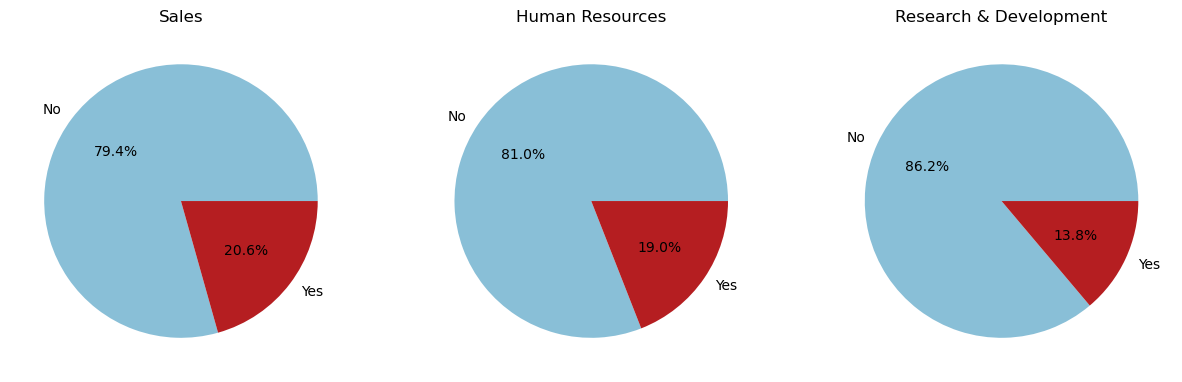

In [30]:
colors = ['#89bfd7','#b51e21']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Pie chart for Sales department
df_sales['Attrition'].value_counts().plot.pie(
    ax=ax[0], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[0].set_title('Sales')
ax[0].set_ylabel('')
# Pie chart for Human Resources department
df_hr['Attrition'].value_counts().plot.pie(
    ax=ax[1], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[1].set_title('Human Resources')
ax[1].set_ylabel('')
# Pie chart for Research & Development department
df_rd['Attrition'].value_counts().plot.pie(
    ax=ax[2], 
    autopct='%1.1f%%', 
    colors=colors
)
ax[2].set_title('Research & Development')
ax[2].set_ylabel('')
plt.show()

### Bivariate Analysis

#### Compare `RelationshipSatisfaction` and `EnvironmentSatisfaction` 

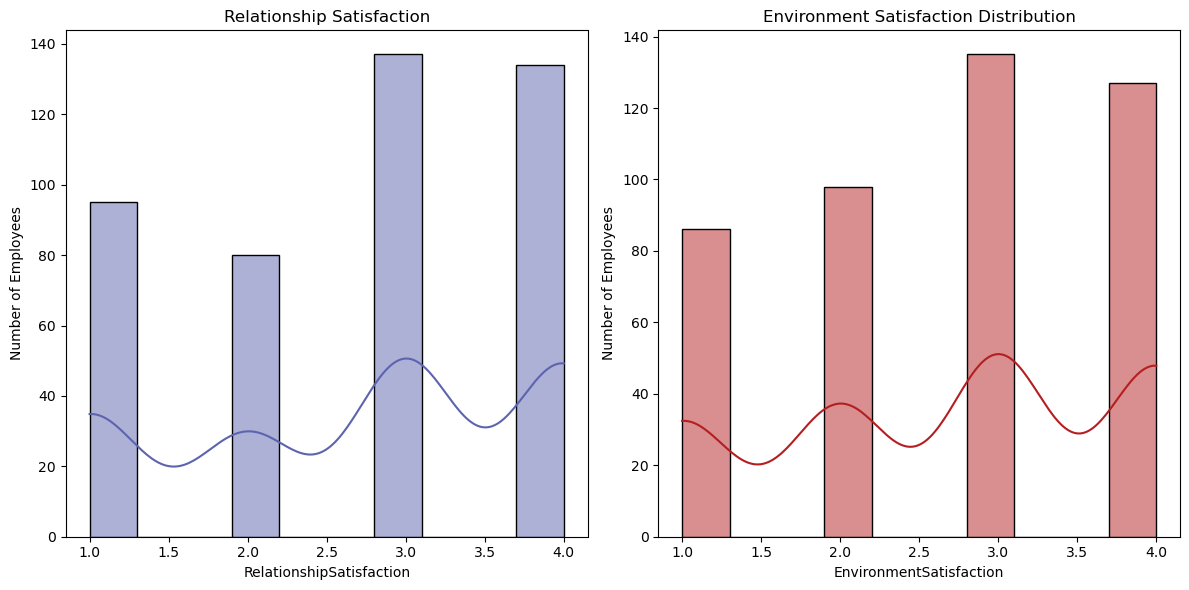

In [31]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot histograms
sns.histplot(df_sales['RelationshipSatisfaction'], ax=ax[0], kde=True, color='#5d64ae')
ax[0].set_title('Relationship Satisfaction')
ax[0].set_ylabel('Number of Employees')
sns.histplot(df_sales['EnvironmentSatisfaction'], ax=ax[1], kde=True, color='#b51e21')
ax[1].set_title('Environment Satisfaction Distribution')
ax[1].set_ylabel('Number of Employees')
plt.tight_layout()
plt.show()

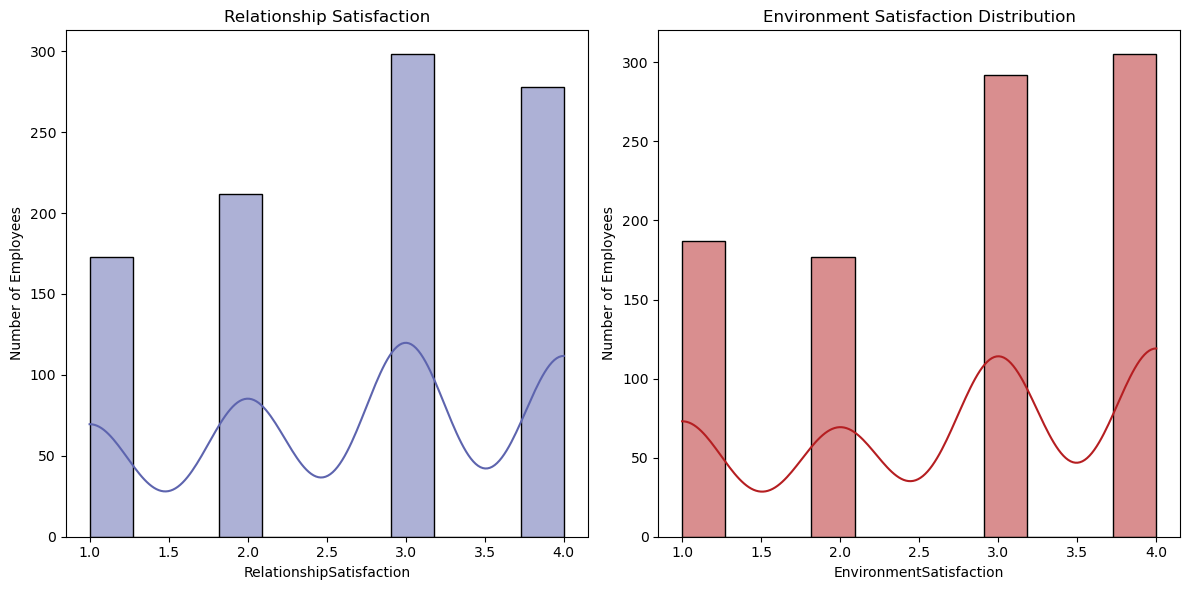

In [32]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot histograms
sns.histplot(df_rd['RelationshipSatisfaction'], ax=ax[0], kde=True, color='#5d64ae')
ax[0].set_title('Relationship Satisfaction')
ax[0].set_ylabel('Number of Employees')
sns.histplot(df_rd['EnvironmentSatisfaction'], ax=ax[1], kde=True, color='#b51e21')
ax[1].set_title('Environment Satisfaction Distribution')
ax[1].set_ylabel('Number of Employees')
plt.tight_layout()
plt.show()

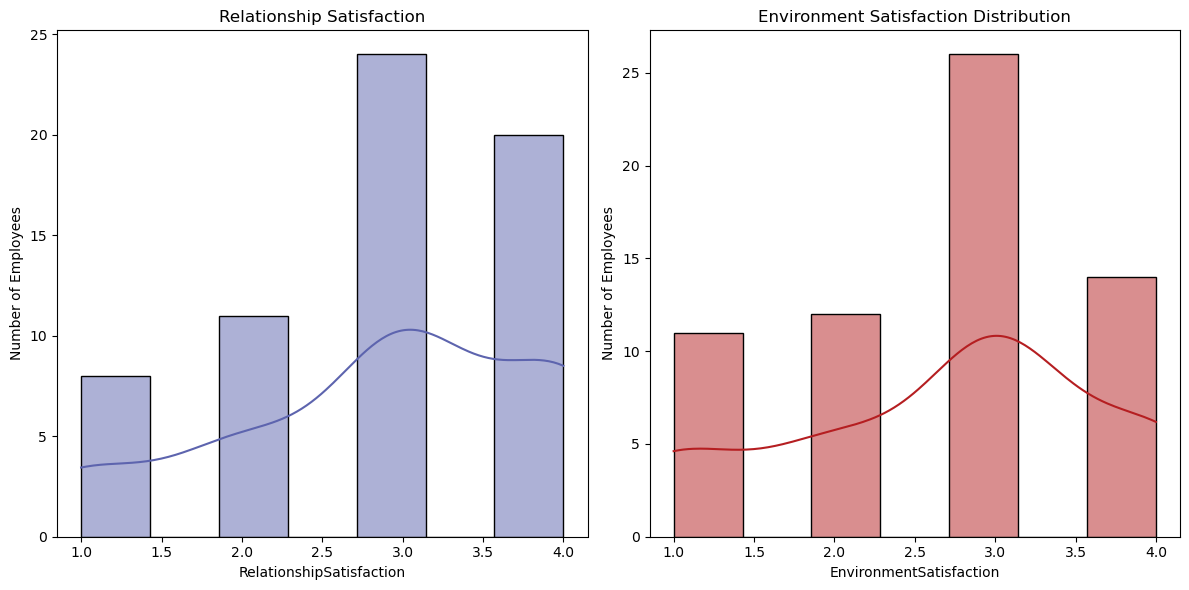

In [33]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot histograms
sns.histplot(df_hr['RelationshipSatisfaction'], ax=ax[0], kde=True, color='#5d64ae')
ax[0].set_title('Relationship Satisfaction')
ax[0].set_ylabel('Number of Employees')
sns.histplot(df_hr['EnvironmentSatisfaction'], ax=ax[1], kde=True, color='#b51e21')
ax[1].set_title('Environment Satisfaction Distribution')
ax[1].set_ylabel('Number of Employees')
plt.tight_layout()
plt.show()

Both Relationship and Environment same shape chart.Therefore, we can say that they affect each other.

#### Relationship Between Years at Company and Monthly Income

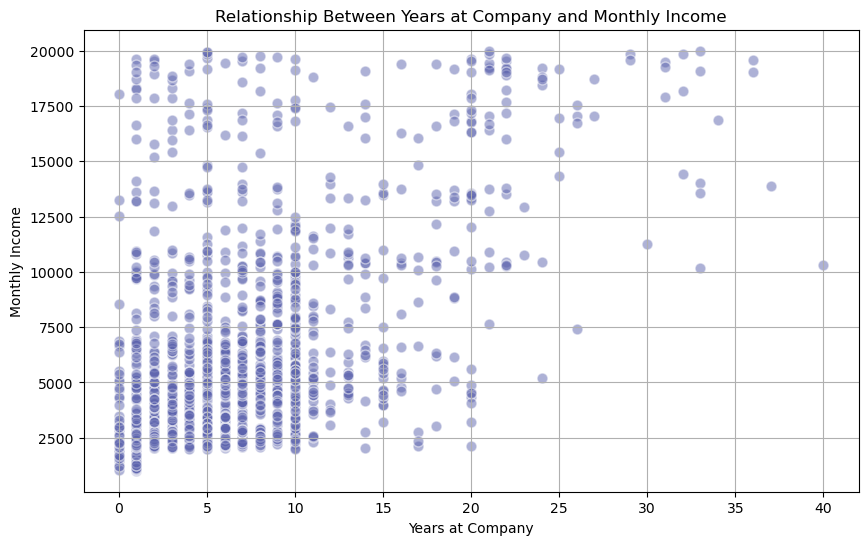

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['YearsAtCompany'], n_df['MonthlyIncome'], alpha=0.5, c='#5d64ae', edgecolors='w', s=60)
plt.title('Relationship Between Years at Company and Monthly Income')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

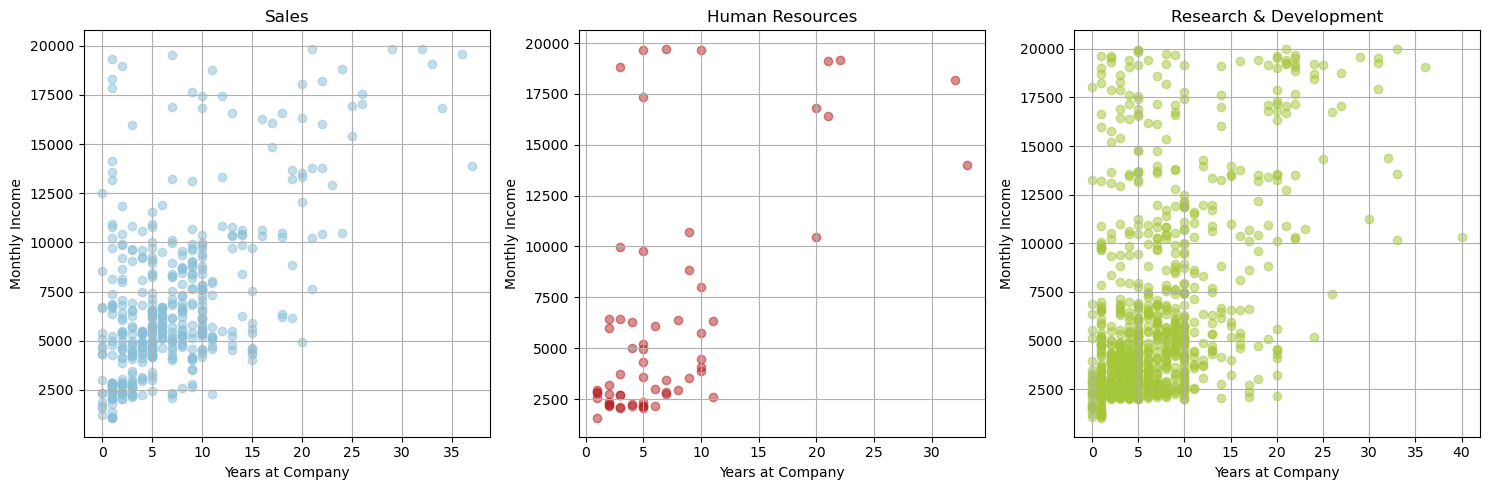

In [35]:
colors = ['#89bfd7', '#b51e21', '#a4c639']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Scatter plot for Sales department
ax[0].scatter(df_sales['YearsAtCompany'], df_sales['MonthlyIncome'], alpha=0.5, color=colors[0])
ax[0].set_title('Sales')
ax[0].set_xlabel('Years at Company')
ax[0].set_ylabel('Monthly Income')
ax[0].grid(True)
# Scatter plot for Human Resources department
ax[1].scatter(df_hr['YearsAtCompany'], df_hr['MonthlyIncome'], alpha=0.5, color=colors[1])
ax[1].set_title('Human Resources')
ax[1].set_xlabel('Years at Company')
ax[1].set_ylabel('Monthly Income')
ax[1].grid(True)
# Scatter plot for Research & Development department
ax[2].scatter(df_rd['YearsAtCompany'], df_rd['MonthlyIncome'], alpha=0.5, color=colors[2])
ax[2].set_title('Research & Development')
ax[2].set_xlabel('Years at Company')
ax[2].set_ylabel('Monthly Income')
ax[2].grid(True)
# Show the plots
plt.tight_layout()
plt.show()

**Following Scatter chart we can see:**
Most employees with 0-5 years of experience have salaries in the range of below 2500 to 7500. However, individuals with salaries above 17500 are evenly distributed, demonstrating that the assessment of employee ability is more important than experience.

#### Relationship between Daily rate and Distance from home

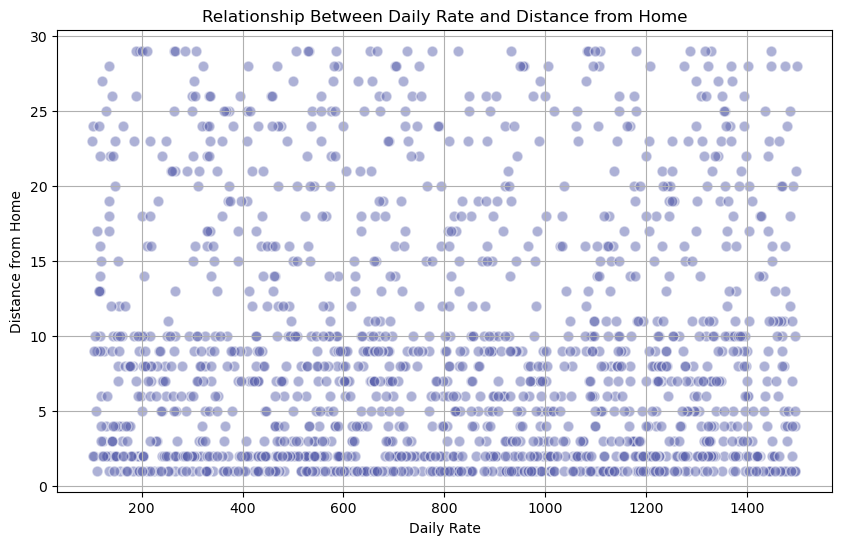

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['DailyRate'], n_df['DistanceFromHome'], alpha=0.5, c='#5d64ae', edgecolors='w', s=60)
plt.title('Relationship Between Daily Rate and Distance from Home')
plt.xlabel('Daily Rate')
plt.ylabel('Distance from Home')
plt.grid(True)
plt.show()


In [37]:
# Number of employees with DistanceFromHome > 15
n_df[n_df['DistanceFromHome'] > 15]['EmpID'].count()

329

Note: 329/1470 employees so far with company, may be have a bonus to keep they work for company

### Multivariate Analysis

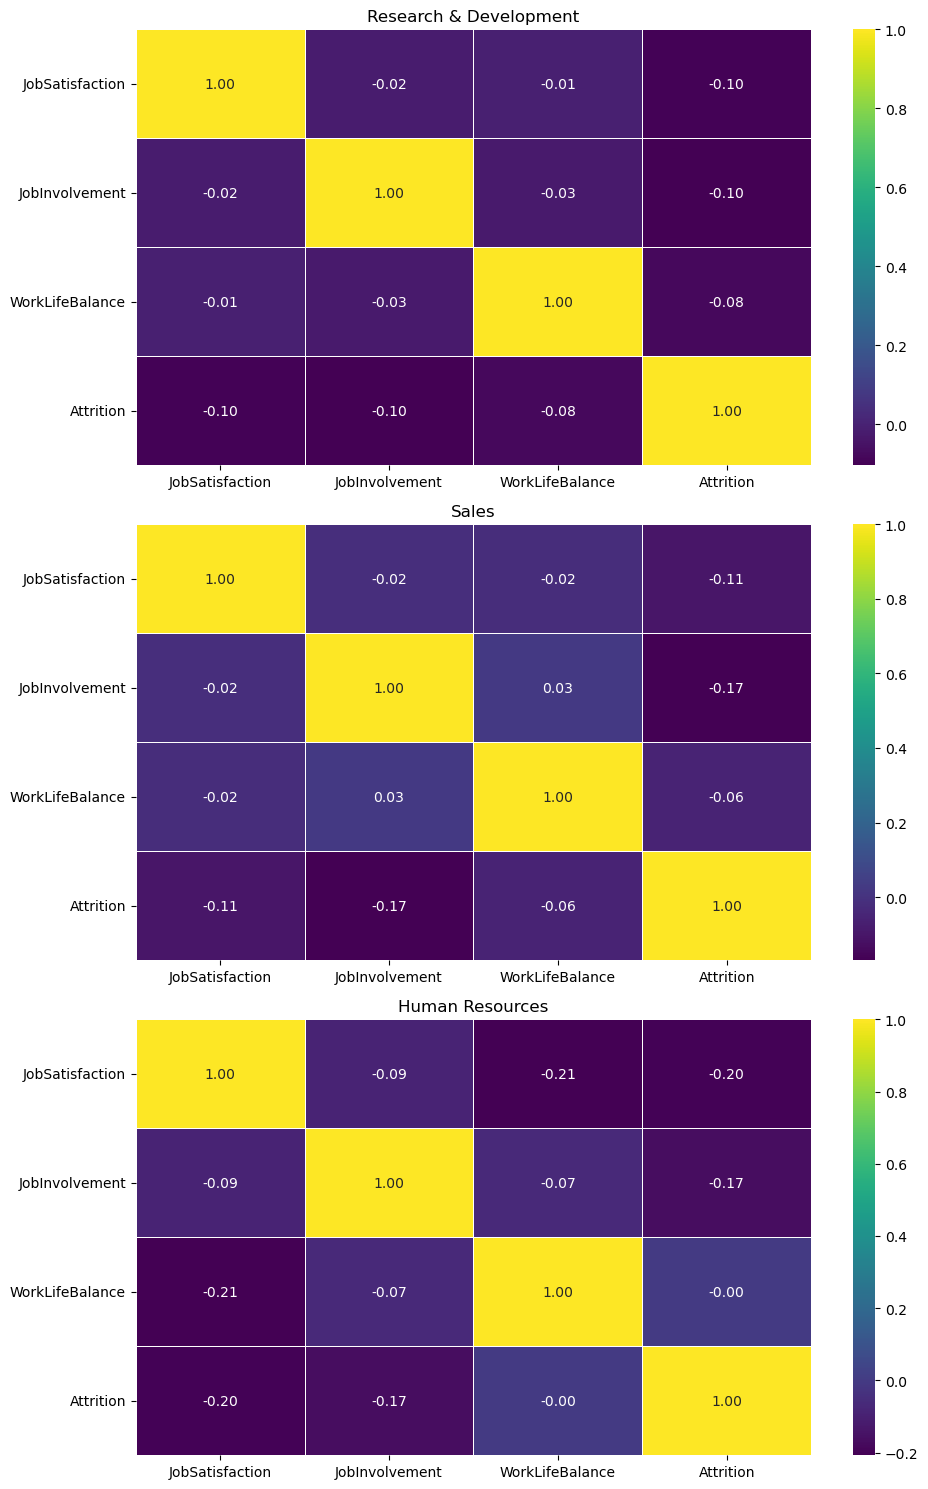

In [38]:
departments = n_df['Department'].unique()
# Create subplots for heatmaps
fig, ax = plt.subplots(len(departments), 1, figsize=(10, 5 * len(departments)))
# Colors for the heatmaps
cmap = 'viridis'
for i, dept in enumerate(departments):
    # Filter data for the department
    df_dept = n_df[n_df['Department'] == dept].copy()
    # Encode Attrition as numerical values
    df_dept['Attrition'] = df_dept['Attrition'].map({'Yes': 1, 'No': 0})
    # Select relevant columns for correlation
    corr_data = df_dept[['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'Attrition']]
    # Calculate the correlation matrix
    corr_matrix = corr_data.corr()
    # Create heatmap
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, ax=ax[i])
    ax[i].set_title(f'{dept}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)  
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

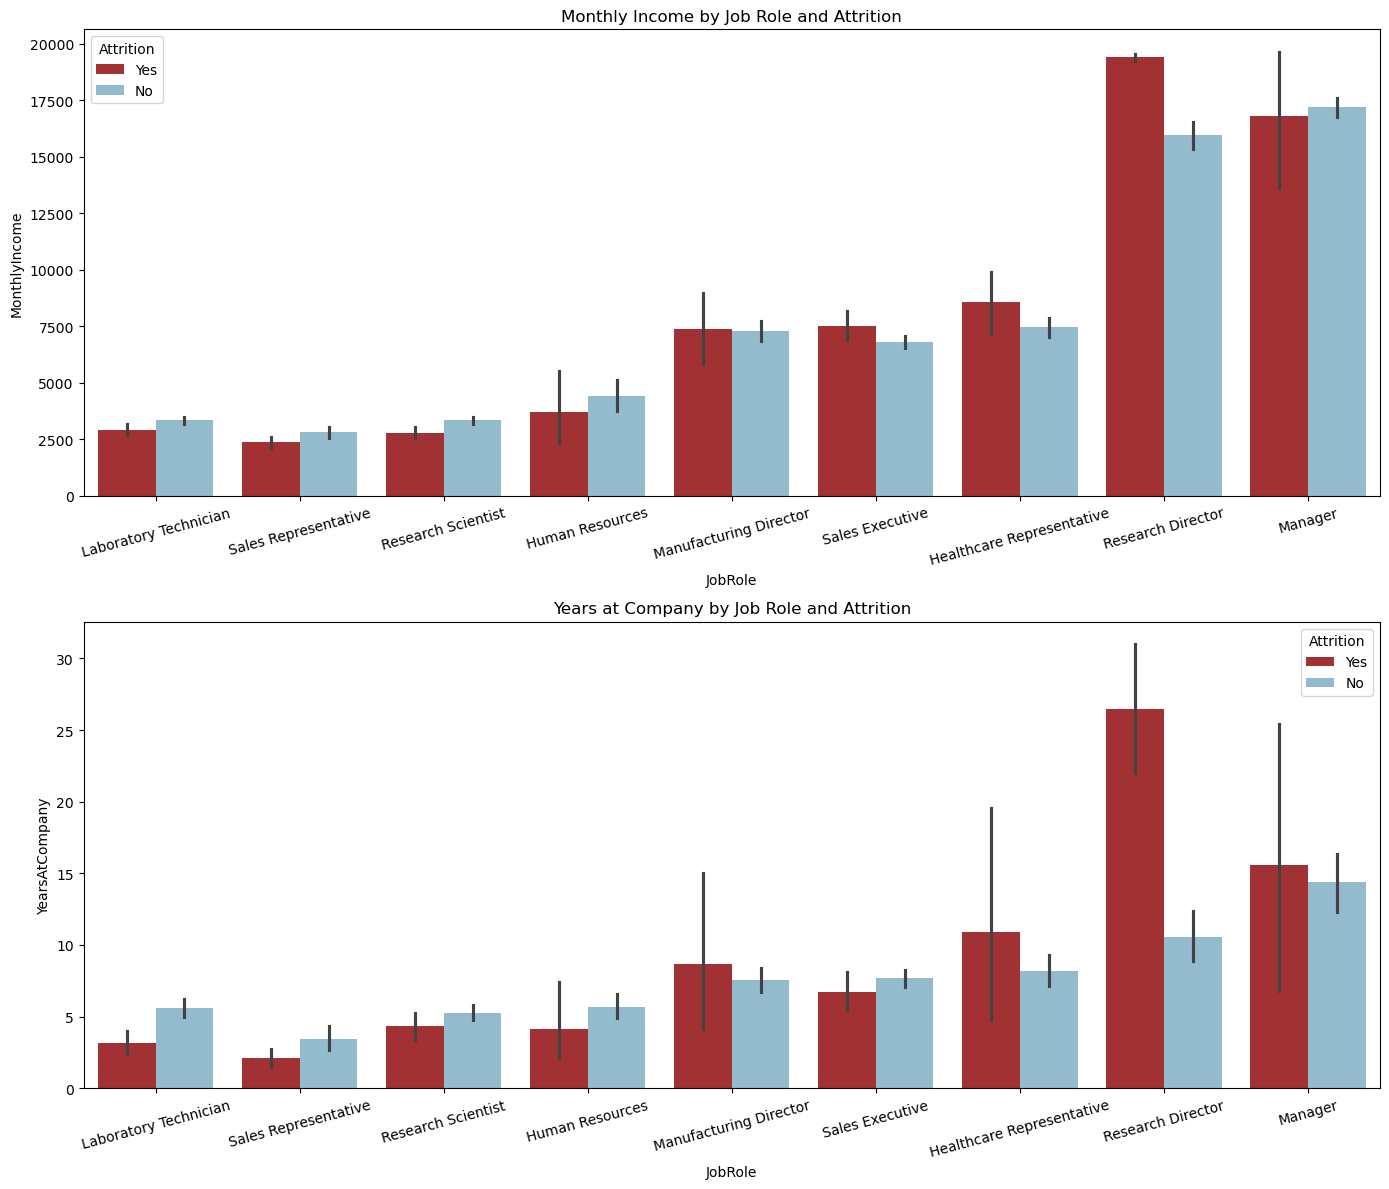

In [39]:
# Define colors for Attrition categories
palette = {'Yes': '#b51e21', 'No': '#89bfd7'}
# Filter relevant columns
df_plot = n_df[['Attrition', 'JobRole', 'MonthlyIncome', 'YearsAtCompany']]
# Create a figure and axes
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
# Grouped bar plot for MonthlyIncome
sns.barplot(data=df_plot, x='JobRole', y='MonthlyIncome', hue='Attrition', palette=palette, ax=ax[0])
ax[0].set_title('Monthly Income by Job Role and Attrition')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15)
ax[0].legend(title='Attrition')
# Grouped bar plot for YearsAtCompany
sns.barplot(data=df_plot, x='JobRole', y='YearsAtCompany', hue='Attrition', palette=palette, ax=ax[1])
ax[1].set_title('Years at Company by Job Role and Attrition')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=15)
ax[1].legend(title='Attrition')
plt.tight_layout()
plt.show()